In [ ]:
import numpy as np
from keras.datasets import mnist

##**mnist 데이터셋 로드**

28x28 이미지 학습용 6만장 테스트용 1만장

---


정답 레이블 0~9 정수

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


이미지 픽셀 값 0-255 ▶ 0-1 로 정규화

In [ ]:
RESHAPED = 784
x_train = x_train.reshape(60000, RESHAPED)
x_test = x_test.reshape(10000, RESHAPED)
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

batch size 100 설정

In [ ]:
x_train = x_train.reshape([600, -1, 784])
x_test = x_test.reshape(100, -1, 784)
y_train = y_train.reshape(600, -1, 1)
y_test = y_test.reshape(100, -1, 1)
print(x_train.shape, x_test.shape, '/', y_train.shape, y_test.shape)

(600, 100, 784) (100, 100, 784) / (600, 100, 1) (100, 100, 1)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

numpy 데이터 torch tensor 형식으로 변경

In [ ]:
x_trainT = torch.Tensor(x_train)
x_testT = torch.Tensor(x_test)
y_trainT = torch.Tensor(y_train)
y_testT = torch.Tensor(y_test)

fully connected model 정의

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, in_sz , out_sz, layers=[120, 84]):
    super().__init__()

    self.fc1 = nn.Linear(in_sz,layers[0])
    self.fc2 = nn.Linear(layers[0],layers[1])
    self.fc3 = nn.Linear(layers[1],out_sz)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return X

input size 28x28 = 784

---


output size 0~9 one hot encoding = 10

In [ ]:
model = MultilayerPerceptron(784, 1)
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

GPU 장치 torch 할당 및 model에 적용

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
epochs = 20
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  model.train()
  for b in range(len(x_trainT)):
    data = x_trainT[b].to(device)
    truth_ = y_trainT[b].to(device)
    y_pred = model(data)    

    loss = criterion(y_pred, truth_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  with torch.no_grad():
    model.eval()
    for b in range(len(x_testT)):
      data = x_testT[b].to(device)
      truth = y_testT[b].to(device)
      y_val = model(data)
      
      tst_corr = torch.sum(torch.round(truth) == torch.round(y_val)) * 100 / 100.0
      
      model.train()
        
    loss = criterion(y_val, truth)
    print('test loss :', loss.item())
    print('test acc :', tst_corr.item()/100, '%')
 

test loss : 1.803176760673523
test acc : 0.39 %
test loss : 1.1892529726028442
test acc : 0.52 %
test loss : 0.9318029880523682
test acc : 0.55 %
test loss : 1.0099323987960815
test acc : 0.53 %
test loss : 0.9565848708152771
test acc : 0.58 %
test loss : 1.116795539855957
test acc : 0.66 %
test loss : 0.9034068584442139
test acc : 0.65 %
test loss : 0.7448521256446838
test acc : 0.59 %
test loss : 0.7491057515144348
test acc : 0.64 %
test loss : 0.7054398059844971
test acc : 0.78 %
test loss : 0.6107631921768188
test acc : 0.74 %
test loss : 0.8862400054931641
test acc : 0.79 %
test loss : 0.7685756683349609
test acc : 0.76 %
test loss : 0.5748775005340576
test acc : 0.82 %
test loss : 0.6834321618080139
test acc : 0.85 %
test loss : 0.6130570769309998
test acc : 0.83 %
test loss : 0.4971795380115509
test acc : 0.81 %
test loss : 0.2638697326183319
test acc : 0.84 %
test loss : 0.41178008913993835
test acc : 0.81 %
test loss : 0.5165746808052063
test acc : 0.79 %


In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    random_sample = np.random.randint(x_test.shape[0])
    model.to('cpu')
    model.eval()
    y_pred = model(torch.Tensor(x_test[random_sample]))
    y_pred = np.round(y_pred.numpy())
    y = np.round(y_test[random_sample])
    
    

In [ ]:
def display_test(x, y, y_pred):
  plt_w = 5
  plt_h = int(np.round(x.shape[0] / plt_w))

  plt.figure(figsize=(12,5))

  for y_pos in range(plt_h):
    for x_pos in range(plt_w):
      idx = y_pos * plt_w + x_pos
      if idx >= x.shape[0] :
        break
     
      plt.subplot(plt_w, plt_h, idx+1)

      prt = '[%d, %d]' % (y[idx], y_pred[idx])
      plt.title(prt)
      plt.imshow(x[idx].reshape(28, 28), 'gray')

      ax = plt.gca()
      ax.axes.xaxis.set_visible(False)
      ax.axes.yaxis.set_visible(False)

  plt.show()

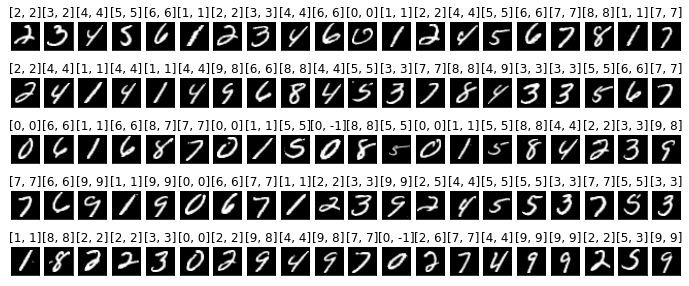

In [ ]:
display_test(x_test[random_sample], y, y_pred)

In [ ]:
y_pred = model(torch.Tensor(x_test[random_sample]))

In [ ]:
y_pred[0:10]